# DECLAN TREVOR KINTU - 100944330

AIDI 2000 - EXERCISE 2
PROFESSOR SAJEEVA SALGADOE

1) Import libraries.

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

2) Load and preprocess data.

In [27]:
# Load and preprocess data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'images\train',
    target_size=(299, 299),  # Xception requires input images to be at least 299x299
    batch_size=32,
    class_mode='binary',  # or 'categorical' if more than two classes
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    r'images\train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


3) Define graph function.

In [28]:
# Define function to plot performance metrics
def plot_performance(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy ' + title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss ' + title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

4) Define and Train model.

In [29]:
# Define the Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional base
base_model.trainable = False

# Add classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # Add a fully connected layer with 512 units and ReLU activation
    Dropout(0.5),  # Add a dropout layer with dropout rate of 0.5 to reduce overfitting
    Dense(256, activation='relu'),  # Add another fully connected layer with 256 units and ReLU activation
    Dropout(0.5),  # Add another dropout layer
    Dense(1, activation='sigmoid')  # Final output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                      

5) Evaluate the model.

In [30]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    r'images\test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 10 images belonging to 2 classes.


1/1 [==============================] - 2s 2s/step - loss: 0.0617 - accuracy: 1.0000
Test accuracy: 1.0


6) Plot model performance.

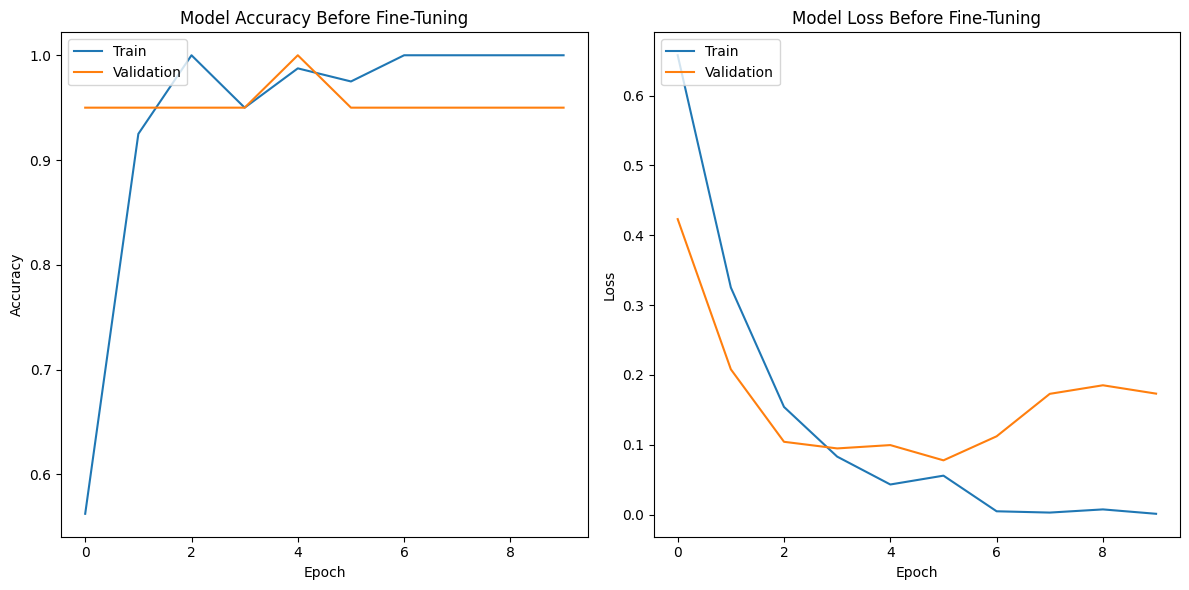

In [31]:
plot_performance(history, 'Before Fine-Tuning')

7) Fine-tune the model.

In [32]:
# Unfreeze some layers of the base model
base_model.trainable = True

# It's important to recompile the model after unfreezing the base model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
3/3 [==============================] - 71s 18s/step - loss: 0.0432 - accuracy: 0.9875 - val_loss: 0.1676 - val_accuracy: 0.9500
Epoch 2/5
3/3 [==============================] - 59s 19s/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1651 - val_accuracy: 0.9500
Epoch 3/5
3/3 [==============================] - 55s 17s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.1627 - val_accuracy: 0.9500
Epoch 4/5
3/3 [==============================] - 54s 17s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1619 - val_accuracy: 0.9500
Epoch 5/5
3/3 [==============================] - 54s 17s/step - loss: 0.0607 - accuracy: 0.9875 - val_loss: 0.1600 - val_accuracy: 0.9500


8) Evaluate Fine-tuned model.

In [33]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    r'images\test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 10 images belonging to 2 classes.


1/1 [==============================] - 2s 2s/step - loss: 0.0555 - accuracy: 1.0000
Test accuracy: 1.0


9) Plot model performance

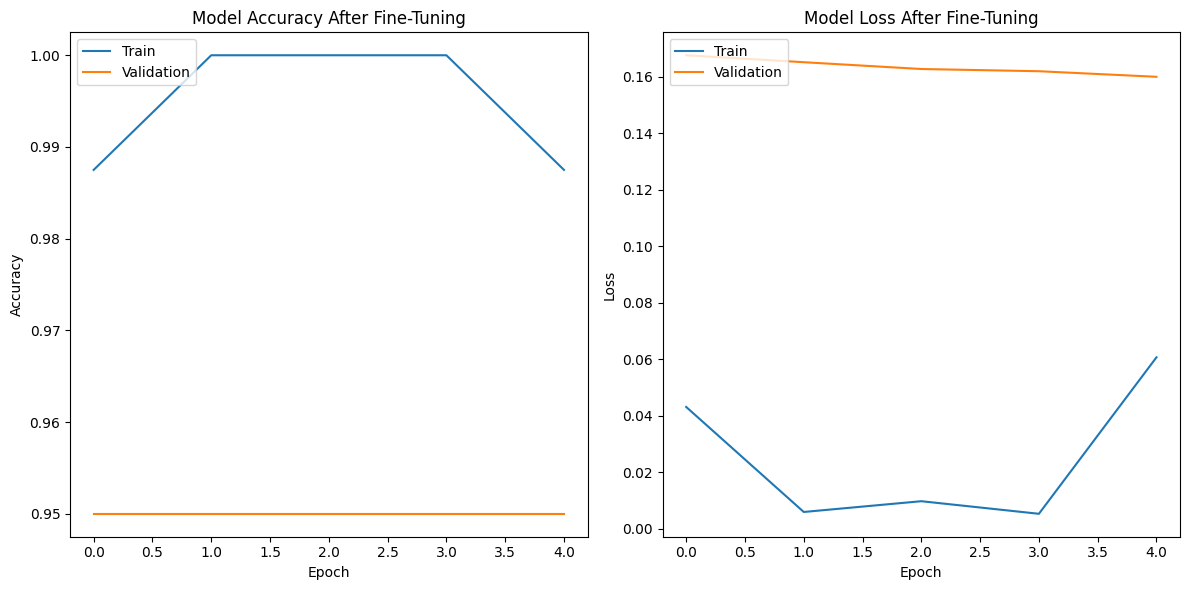

In [34]:
plot_performance(history_fine, 'After Fine-Tuning')